In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(10246)

In [2]:
# 生成训练数据
n = 10
X0 = np.c_[np.random.uniform(-1, 1, size=3*n).reshape(-1, 1),
           np.random.uniform(-1, 1, size=3*n).reshape(-1, 1)]
Y0 = np.array([0] * 3 * n).reshape(-1, 1)
X1 = np.c_[np.random.uniform(0.4, 1, size=n).reshape(-1, 1),
           np.random.uniform(0, 1, size=n).reshape(-1, 1)]
Y1 = np.array([1] * n).reshape(-1, 1)
X2 = np.c_[np.random.uniform(-0.9, -0.6, size=n).reshape(-1, 1),
           np.random.uniform(-0.5, 0.5, size=n).reshape(-1, 1)]
Y2 = np.array([1] * n).reshape(-1, 1)
X = np.concatenate((X0, X1, X2), axis=0)
Y = np.concatenate((Y0, Y1, Y2), axis=0)
data = np.concatenate((Y, X), axis=1)
data = pd.DataFrame(data, columns=['y', 'x1', 'x2'])

In [3]:
# 训练决策树模型
res = []
for i in range(1, 4):
    model = DecisionTreeClassifier(criterion='gini', max_depth=i)
    model.fit(data[['x1', 'x2']], data['y'])
    res.append(model)

In [4]:
def draw_data(ax, data):
    '''
    将数据可视化
    '''
    label1 = data[data['y'] > 0]
    ax.scatter(label1[['x1']], label1[['x2']], marker='o')
    label0 = data[data['y'] == 0]
    ax.scatter(label0[['x1']], label0[['x2']], marker='^', color='k')
    return ax

In [5]:
def draw_model(ax, model, index):
    '''
    将模型的分离超平面可视化
    '''
    x = np.linspace(-1.2, 1.2, 400)
    X1, X2 = np.meshgrid(x, x)
    for i in range(index+1):
        data = pd.DataFrame(np.c_[X1.ravel(), X2.ravel()], columns=['x1', 'x2'])
        Y = model[i].predict(data)
        Y = Y.reshape(X1.shape)
        ax.contour(X1, X2, Y, levels=[0, 1], colors=['r', 'r'],
                   linestyles=['-', '-'])
    ax.contourf(X1, X2, Y, levels=[-100, 0], colors=['gray'], alpha=0.4)
    return ax

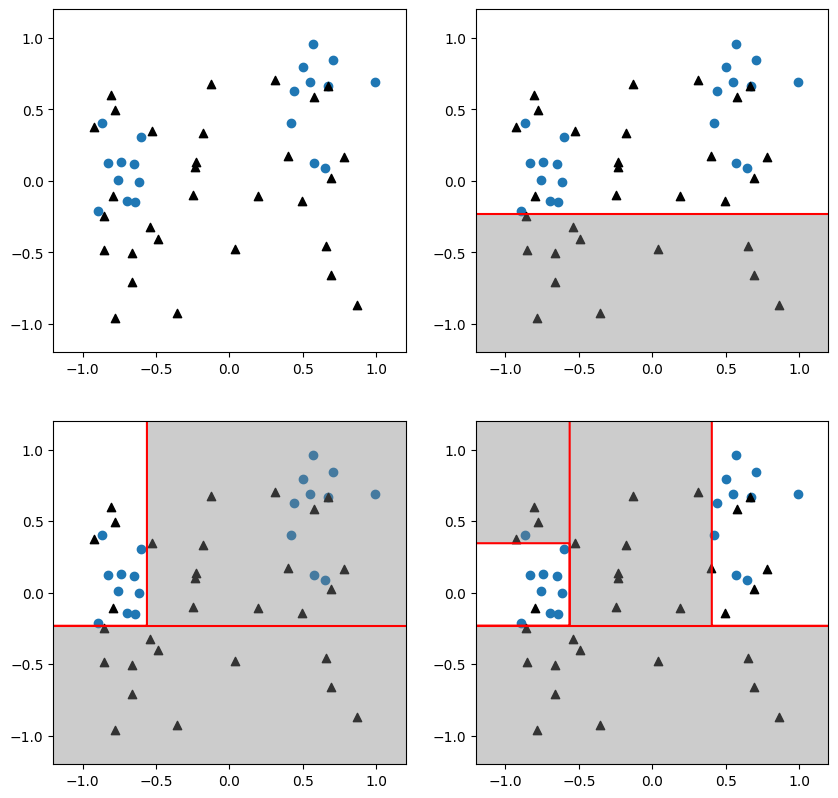

In [6]:
# 将数据和模型结果可视化
# 创建一个图形框
fig = plt.figure(figsize=(10, 10), dpi=100)
# 在图形框里画四幅图
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    draw_data(ax, data)
    if i != 0:
        draw_model(ax, res, i-1)
plt.savefig('dt_example.png', dpi=200)
plt.show()

In [7]:
# 如果电脑里已安装了GraphViz，程序运行完之后，在终端执行如下命令生成图片
# dot -Tpng -Gdpi=300 decision_tree.dot -o decision_tree.png
export_graphviz(res[-1], 'decision_tree.dot', feature_names=['x1', 'x2'])